In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

pc_image = cv2.imread('blank_screen_and_woman.jpeg')
wallpaper_image = cv2.imread('my_screen.png')


In [27]:
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

# driver function
if __name__=="__main__":

	# reading the image
	img = cv2.imread('blank_screen_and_woman.jpeg', 1)

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()


In [75]:
# Define four points on the planar surface in the base image
# In this question, we define the four corner points in the computer screen
x1=195
y1=81
x4=221
y4=386
x2=686
y2=42
x3=691
y3=315

points_main_image = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.float32)

# Define four points of the wallpaper image (assuming it's a rectangle)
#img_width, img_height, _ = wallpaper_image.shape
img_height, img_width, _ = wallpaper_image.shape
points_wallpaper = np.array([[0, 0], [img_width, 0], [img_width, img_height], [0, img_height]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(points_wallpaper, points_main_image)

# Warp the wallpaper image to match the computer's screen
wallpaper_warped = cv2.warpPerspective(wallpaper_image, homography_matrix, (pc_image.shape[1], pc_image.shape[0]))

# Blend the warped wallpaper onto the image of the pc
blended_image = cv2.addWeighted(pc_image, 0.5, wallpaper_warped, 0.5, 0)

# Display the result
cv2.imshow('Superimposed Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Blended image')

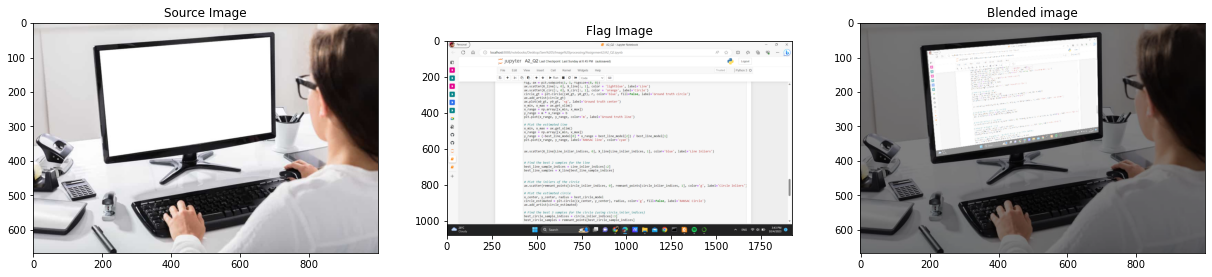

In [76]:
fig,ax=plt.subplots(1,3,figsize=(21,7))
ax[0].imshow(cv2.cvtColor(pc_image,cv2.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[1].imshow(cv2.cvtColor(wallpaper_image,cv2.COLOR_BGR2RGB))
ax[1].set_title("Flag Image")
ax[2].imshow(cv2.cvtColor(blended_image,cv2.COLOR_BGR2RGB))
ax[2].set_title("Blended image")

In [86]:
frame_image = cv2.imread('blank_picture_frame.jpg')
flag_image = cv2.imread('me.jpg')


In [87]:
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)

# driver function
if __name__=="__main__":

    # reading the image
    img = cv2.imread('blank_picture_frame.jpg', 1)

    # displaying the image
    cv2.imshow('image', img)

    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)

    # wait for a key to be pressed to exit
    cv2.waitKey(0)

    # close the window
    cv2.destroyAllWindows()

404   307
244   309
400   93


In [79]:
x1=244
y1=91
x4=243
y4=309
x2=402
y2=94
x3=404
y3=308

points_main_image = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.float32)

# Define four points of the wallpaper image (assuming it's a rectangle)
img_height, img_width, _ = flag_image.shape
points_frame = np.array([[0, 0], [img_width, 0], [img_width, img_height], [0, img_height]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(points_frame, points_main_image)

# Warp the wallpaper image to match the computer's screen
me_warped = cv2.warpPerspective(flag_image, homography_matrix, (frame_image.shape[1], frame_image.shape[0]))

# Blend the warped wallpaper onto the image of the pc
blended_image = cv2.addWeighted(frame_image, 0.6, me_warped, 0.5, 0)

# Display the result
cv2.imshow('Superimposed Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Blended image')

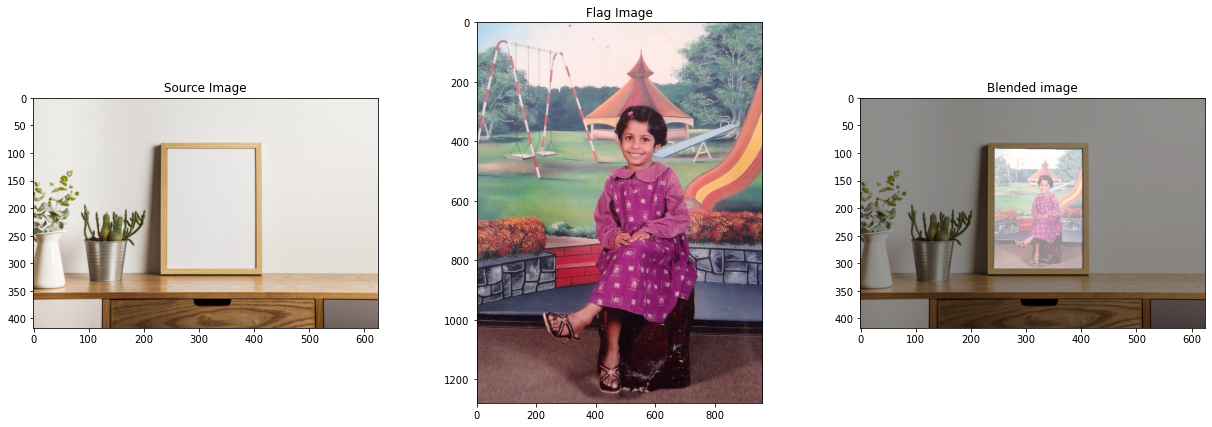

In [80]:
fig,ax=plt.subplots(1,3,figsize=(21,7))
ax[0].imshow(cv2.cvtColor(frame_image,cv2.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[1].imshow(cv2.cvtColor(flag_image,cv2.COLOR_BGR2RGB))
ax[1].set_title("Flag Image")
ax[2].imshow(cv2.cvtColor(blended_image,cv2.COLOR_BGR2RGB))
ax[2].set_title("Blended image")

In [81]:
frame_image = cv2.imread('meme_template.jpg')
flag_image = cv2.imread('ranja.jpg')

In [63]:
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

# driver function
if __name__=="__main__":

	# reading the image
	img = cv2.imread('meme_template.jpg', 1)

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()

306   214
629   150
691   401
369   468


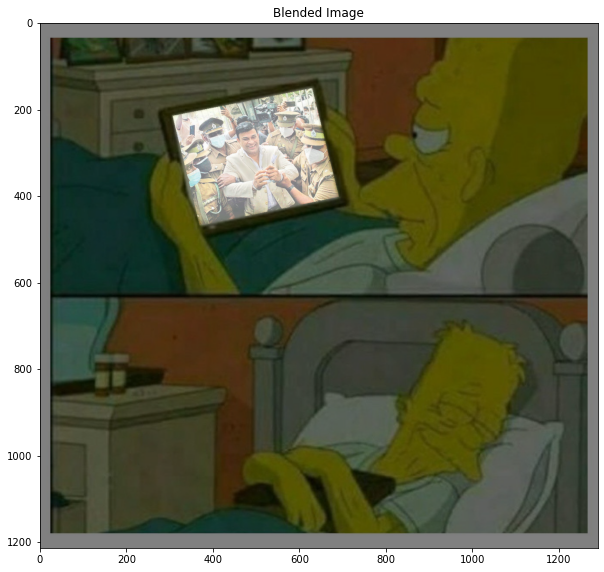

In [82]:
x1=306
y1=214

x2=629
y2=150

x3=691
y3=401

x4=369
y4=468

points_main_image = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.float32)

# Define four points of the wallpaper image (assuming it's a rectangle)
img_height, img_width, _ = flag_image.shape
points_frame = np.array([[0, 0], [img_width, 0], [img_width, img_height], [0, img_height]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(points_frame, points_main_image)

# Warp the wallpaper image to match the computer's screen
me_warped = cv2.warpPerspective(flag_image, homography_matrix, (frame_image.shape[1], frame_image.shape[0]))

# Blend the warped wallpaper onto the image of the pc
blended_image = cv2.addWeighted(frame_image, 0.5, me_warped, 0.5, 0)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title('Blended Image')
plt.show()

Text(0.5, 1.0, 'Blended image')

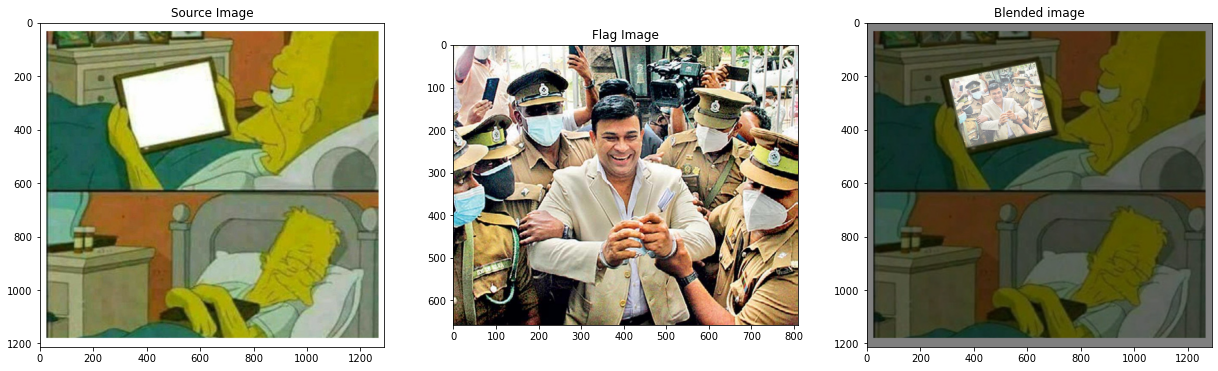

In [83]:
fig,ax=plt.subplots(1,3,figsize=(21,7))
ax[0].imshow(cv2.cvtColor(frame_image,cv2.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[1].imshow(cv2.cvtColor(flag_image,cv2.COLOR_BGR2RGB))
ax[1].set_title("Flag Image")
ax[2].imshow(cv2.cvtColor(blended_image,cv2.COLOR_BGR2RGB))
ax[2].set_title("Blended image")